## Finite Differences for Laplace Equation.

Source: [link](https://nbviewer.org/urls/www.numfys.net/media/notebooks/partial_differential_equations_two_examples.ipynb)

In [3]:
!apt install libcgal-dev libeigen3-dev
!pip install -U pygalmesh


import pygalmesh

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgmp-dev libgmpxx4ldbl libmpfr-dev
Suggested packages:
  libmpfi-dev libntl-dev libeigen3-doc libmpfrc++-dev gmp-doc libgmp10-doc libmpfr-doc
The following NEW packages will be installed:
  libcgal-dev libeigen3-dev libgmp-dev libgmpxx4ldbl libmpfr-dev
0 upgraded, 5 newly installed, 0 to remove and 19 not upgraded.
Need to get 6,457 kB of archives.
After this operation, 52.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgmpxx4ldbl amd64 2:6.2.1+dfsg-3ubuntu1 [9,580 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgmp-dev amd64 2:6.2.1+dfsg-3ubuntu1 [337 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libmpfr-dev amd64 4.1.0-3build3 [271 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcgal-dev amd64 5.4-1 [4,784 kB]
Get:5 http://archive.u

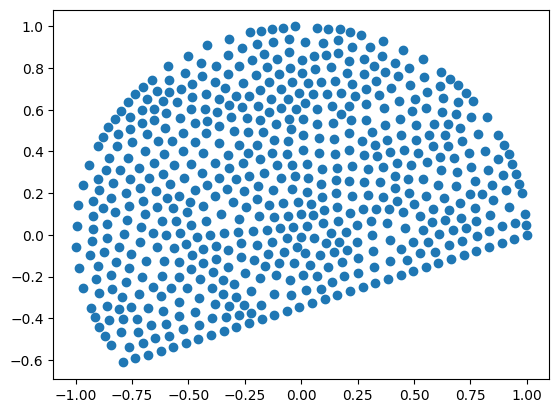

In [85]:
import pygalmesh
import numpy as np
import matplotlib.pyplot as plt

# Test case: Make a ring with edges = 0 as a boundary condition
R1 = 1
R2 = 2
ntheta = 20
thetas = np.linspace(0,2*2,ntheta,endpoint=False)
inner_boundary = np.array([ [ R1*np.cos(theta), R1*np.sin(theta) ] for theta in thetas ])
outer_boundary = np.array([ [ R2*np.cos(theta), R2*np.sin(theta) ] for theta in thetas ])

#plt.scatter([ loc[0] for loc in inner_boundary ],[ loc[1] for loc in inner_boundary ])
#plt.scatter([ loc[0] for loc in outer_boundary ],[ loc[1] for loc in outer_boundary ])

# The constraints should link our ring points together.
inner_constraints = [ [n-1,n] for n in range(1,len(inner_boundary)) ] + [[len(inner_boundary)-1,0]]
outer_constraints = [ [n-1,n] for n in range(1+len(inner_constraints),len(outer_boundary)+len(inner_constraints)) ] + [[len(outer_boundary)+len(inner_boundary)-1,len(inner_boundary)]]

points = inner_boundary#np.concatenate((inner_boundary,outer_boundary))
constraints = inner_constraints#inner_constraints + outer_constraints

#points = np.array([[0.0, 0.0], [1.0, 0.0], [1.0, 1.0], [0.0, 1.0], [0.25, 0.25], [0.75,0.25], [0.75,0.75], [0.25, 0.75] ])
#constraints = [[0, 1], [1, 2], [2, 3], [3, 0], [4,5], [5,6], [6,7],[7,4]]

mesh = pygalmesh.generate_2d(
    points,
    constraints,
    max_edge_size=1.0e-1,
    num_lloyd_steps=10,
)

locations = mesh.points
plt.scatter([ loc[0] for loc in locations ],[ loc[1] for loc in locations ])

In [ ]:
import matplotlib.pyplot as plt
import numpy.linalg as linalg
import numpy as np

# Set common figure parameters:
newparams = {'figure.figsize': (16, 6), 'font.size': 20}
plt.rcParams.update(newparams)

In [ ]:
# Set the number of grid points
Nx = 50
dx = 1/(Nx+1)
x = np.linspace(dx, 1, Nx+1)

dy = dx
Ny = int(1/dy - 2)
N = (Nx+1)*(Ny+1)
y = np.linspace(dy, 1-dx, Ny+1)

# Set constants at boundary
ua = 5
ub = 5*(1-np.sin(np.pi*x))
uc = 5

### Construct the matrix A
A = np.zeros([N,N])

for i in range(N):
    # Set the diagonals to -4
    A[i, i] = -4
    # Set the non-zero off-diagonals to 1
    if i > 0:
        A[i, i-1] = 1
    if i < N-1:
        A[i, i+1] = 1
    if i < N-Nx-1:
        A[i+Nx+1, i] = 1
        A[i, i+Nx+1] = 1

for i in range(N):
    # Some elements must be changed to 2 due to the Neumann BCs
    if (i+1)%(Nx+1) == 0:
        A[i,i-1] = 2

    # In addition some elements must be set to zero, since
    # the elements are taken care of by terms in b
    if i > 0 and i < N - 1 and (i+1)%(Nx+1) == 0:
        A[i, i+1] = 0
        A[i+1, i] = 0

### Construct the right hand side vector b:
b = np.zeros(N)

# For j = 0, set elements to -ua
b[0:Nx+1] = - ua

# For i = 0, set the elements to -uc
indices = np.mod(range(N),Nx+1) == 0
b[indices] += -uc

# For j = Ny, set elements to -ub(x_i)
for i in range(Nx+1):
    b[N-Nx-1+i] += -ub[i]


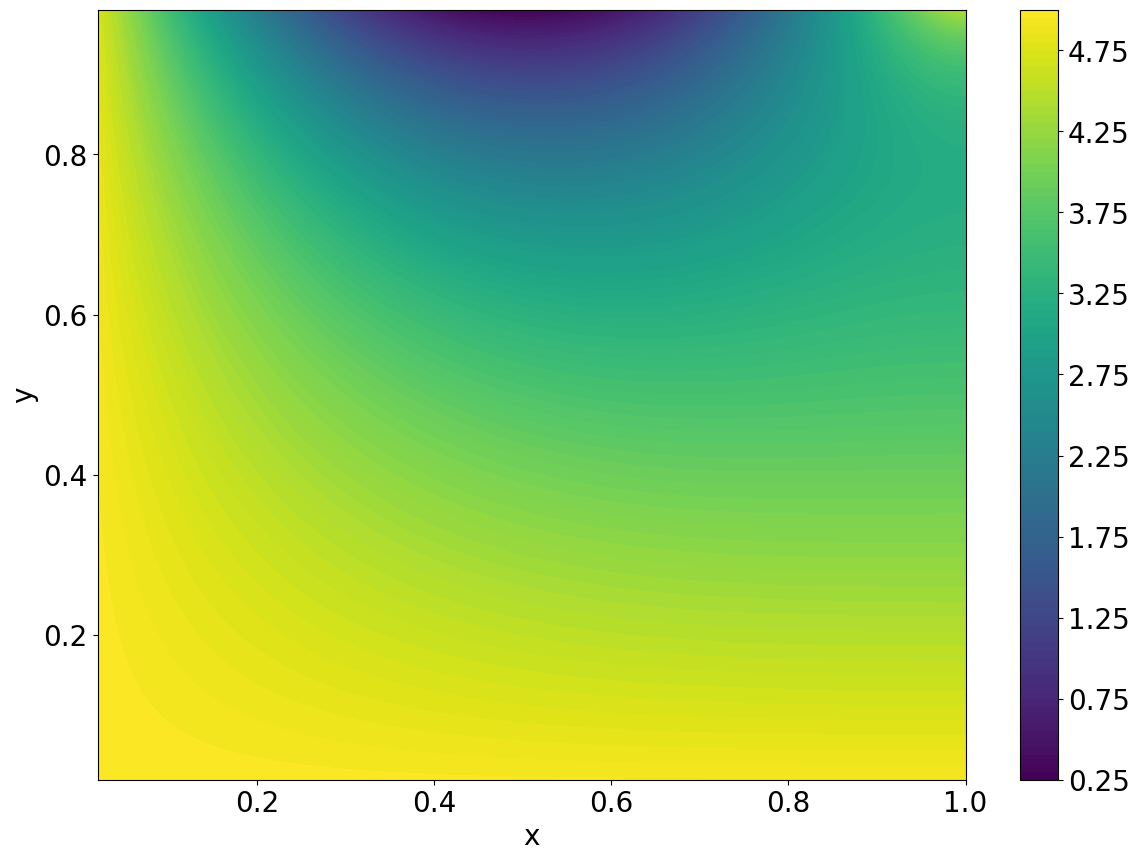

In [ ]:
# Solve the system using linalg
u = linalg.solve(A,b)

# Reshape solution array to be able to plot it
u_ = u.reshape(Ny+1,Nx+1)
plt.figure(figsize=(14, 10))
plt.contourf(x, y, u_, 100)
plt.colorbar()
plt.ylabel('y')
plt.xlabel('x')
plt.show()